In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from utils_NN import getData, softmax, cost, y2indicator, error_rate

In [31]:
class LogisticModel(object):
    def __init__(self):
        pass

    def forward(self, X):
        return softmax(X.dot(self.W) + self.b)

    def predict(self, X):
        # converts result from sigmoid into binary (0, 1)
        pY = self.forward(X)
        return np.argmax(pY, axis=1)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)

    def fit(self, X, Y, learning_rate=10e-8, reg=10e-12, epochs=10000, show_fig=False):
        X, Y = shuffle(X, Y) # type: ignore
        Xval, Yval = X[-1000:], Y[-1000:] # type: ignore
        Tval = y2indicator(Yval)
        X, Y = X[:-1000], Y[:-1000] # type: ignore
        T = y2indicator(Y)

        N, D = X.shape  # examples, dimensions
        K = len(set(Y))  # number of classes from the unique values of Y

        self.W = np.random.randn(D, K) / np.sqrt(D + K)
        self.b = 0

        costs = []
        best_validadion_error = 1
        for i in range(epochs):
            # forward propagation
            pY = self.forward(X)
            # gradient descent step
            self.W -= learning_rate * (X.T.dot(pY - T) + reg*self.W)
            self.b -= learning_rate * ((pY - T).sum(axis=0) + reg*self.b)

            if i % 20 == 0:
                pYval = self.forward(Xval)
                c = cost(Tval, pYval)
                costs.append(c)
                e = error_rate(Yval, np.argmax(pYval, axis=1))
                print(f"i: {i};  cost: {c};  error: {e}")
                if e < best_validadion_error:
                    best_validadion_error = e
        print(f"best_validation_error: {best_validadion_error}")

        if show_fig:
            plt.plot(costs)
            plt.show()

In [32]:
def main():
    X, Y, _, _ = getData()

    model = LogisticModel()
    model.fit(X, Y, show_fig=True)
    print(f"Model score: {model.score(X, Y)}")

i: 0;  cost: 2014.3599222873422;  error: 0.866
i: 20;  cost: 1923.3538241833294;  error: 0.767
i: 40;  cost: 1914.8513275989603;  error: 0.764
i: 60;  cost: 1907.7409546146116;  error: 0.761
i: 80;  cost: 1901.6415229387962;  error: 0.761
i: 100;  cost: 1896.2855807873334;  error: 0.758
i: 120;  cost: 1891.4907055744122;  error: 0.757
i: 140;  cost: 1887.1308891417962;  error: 0.758
i: 160;  cost: 1883.1176241182688;  error: 0.76
i: 180;  cost: 1879.3875128373352;  error: 0.761
i: 200;  cost: 1875.894155953598;  error: 0.76
i: 220;  cost: 1872.6028199892194;  error: 0.762
i: 240;  cost: 1869.4869045555497;  error: 0.754
i: 260;  cost: 1866.5255778106641;  error: 0.751
i: 280;  cost: 1863.7021746070873;  error: 0.747
i: 300;  cost: 1861.0030966101626;  error: 0.747
i: 320;  cost: 1858.4170460552818;  error: 0.746
i: 340;  cost: 1855.9344837430376;  error: 0.741
i: 360;  cost: 1853.5472395800907;  error: 0.738
i: 380;  cost: 1851.248228233757;  error: 0.732
i: 400;  cost: 1849.0312381872

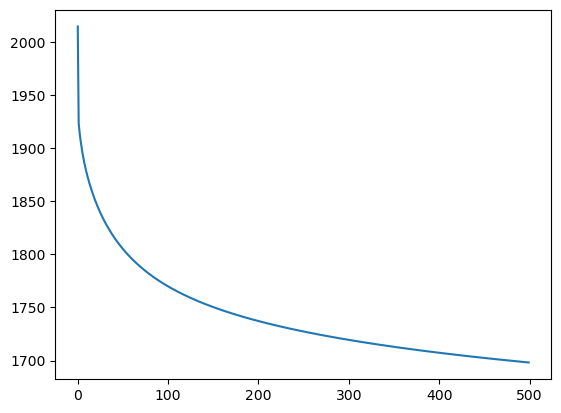

Model score: 0.3704547199263031


In [33]:
if __name__ == '__main__':
    main()